In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Downloading dataset
path_to_data = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print(f"Dataset downloaded at: {path_to_data}")

Dataset downloaded at: C:\Users\adnan\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [4]:
# Define dataset paths
dataset_directory = os.path.join(path_to_data, "chest_xray")
train_dir = os.path.join(dataset_directory, "train")
test_dir = os.path.join(dataset_directory, "test")
val_dir = os.path.join(dataset_directory, "val")

print(f"Dataset Contents: {os.listdir(dataset_directory)}")
print(f"Training Data: {os.listdir(train_dir)}")
print(f"Testing Data: {os.listdir(test_dir)}")
print(f"Validation Data: {os.listdir(val_dir)}")

Dataset Contents: ['chest_xray', 'test', 'train', 'val', '__MACOSX']
Training Data: ['NORMAL', 'PNEUMONIA']
Testing Data: ['NORMAL', 'PNEUMONIA']
Validation Data: ['NORMAL', 'PNEUMONIA']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Image augmentation for training dataset
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [9]:
# Data generators for validation and test sets
data_generator = ImageDataGenerator(rescale=1./255)
validation_data = data_generator.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_data = data_generator.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
# Construct CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

C:\Users\adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


# Train the model
num_epochs = 10
train_history = cnn_model.fit(
    train_data,
    epochs=num_epochs,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 708ms/step - accuracy: 0.7017 - loss: 0.6557 - val_accuracy: 0.7500 - val_loss: 0.6519
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 355ms/step - accuracy: 0.7817 - loss: 0.4090 - val_accuracy: 0.8750 - val_loss: 0.5036
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 452ms/step - accuracy: 0.8330 - loss: 0.3407 - val_accuracy: 0.7500 - val_loss: 0.5566
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 558ms/step - accuracy: 0.8706 - loss: 0.2939 - val_accuracy: 0.9375 - val_loss: 0.4498
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 548ms/step - accuracy: 0.8721 - loss: 0.2823 - val_accuracy: 0.9375 - val_loss: 0.3824
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 401ms/step - accuracy: 0.8988 - loss: 0.2379 - val_accuracy: 0.7500 - val_loss: 0.6518
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 346ms/step - accuracy: 0.9135 - loss: 0.2188 - val_accuracy: 0.8750 - val_loss: 0.3505
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 342ms/step - accuracy: 0.9241 - loss: 

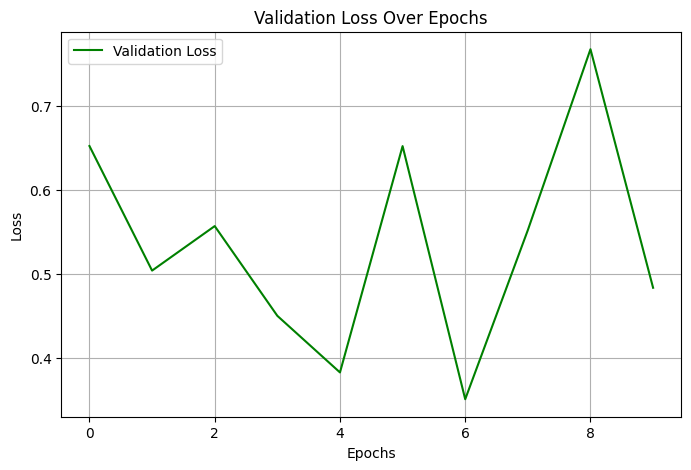

In [12]:
# Plot validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(train_history.history['val_loss'], 'g', label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Evaluate model on test data
y_predictions = cnn_model.predict(test_data)
y_actual = test_data.classes
y_pred_labels = (y_predictions > 0.5).astype(int)

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 501ms/step


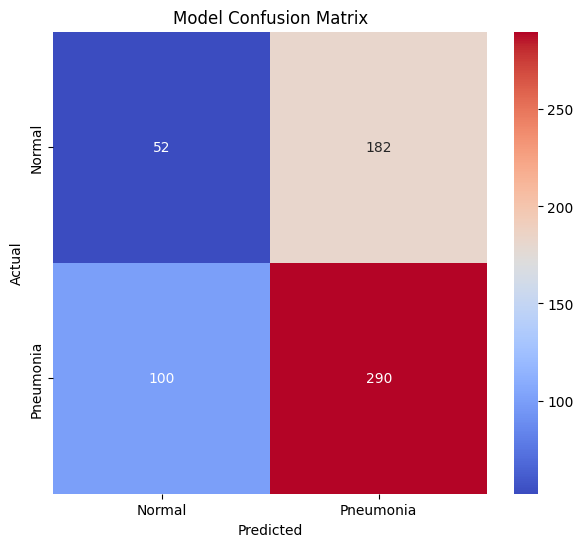

In [14]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_actual, y_pred_labels)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model Confusion Matrix')
plt.show()